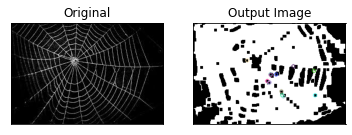

In [12]:
# importing necessary libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

# read a cracked sample image
img = cv2.imread('Test5.jpg')

# Convert into gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Image processing ( smoothing )
# Averaging
blur = cv2.blur(gray,(3,3))

# Apply logarithmic transform
img_log = (np.log(blur+1)/(np.log(1+np.max(blur))))*255

# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)

# Image smoothing: bilateral filter
bilateral = cv2.bilateralFilter(img_log, 5, 75, 75)

# Canny Edge Detection
edges = cv2.Canny(bilateral,100,200)

# Morphological Closing Operator
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Create feature detecting method
# sift = cv2.xfeatures2d.SIFT_create()
# surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create(nfeatures=15)

# Make featured Image
keypoints, descriptors = orb.detectAndCompute(closing, None)
featuredImg = cv2.drawKeypoints(closing, keypoints, None)

# Create an output image
cv2.imwrite('CrackDetected-7.jpg', featuredImg)

# Use plot to show original and output image
plt.subplot(121),plt.imshow(img)
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(featuredImg,cmap='gray')
plt.title('Output Image'),plt.xticks([]), plt.yticks([])
plt.show()